In [1]:
import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib._color_data as mcd
import seaborn as sns
%matplotlib inline

In [2]:
data = {}

data['circuits'] = pd.read_csv('Formula1_data/circuits.csv')
#Id, reference name, name, loc
data['constructor_results'] = pd.read_csv('Formula1_data/constructor_results.csv')
#constuctorId, raceId, points
data['constructor_standings'] = pd.read_csv('Formula1_data/constructor_standings.csv')
#stanidingsId, raceId, constructorId, points, position, wins
data['constructors'] = pd.read_csv('Formula1_data/constructors.csv')
#id, name, nationality
data['driver_standings'] = pd.read_csv('Formula1_data/driver_standings.csv')
#id, raceId, driverId, points, position, wins
data['drivers'] = pd.read_csv('Formula1_data/drivers.csv')
#id, name, number, DOB and other detaiils
data['lap_times'] = pd.read_csv('Formula1_data/lap_times.csv')
#raceId, DriverID, lap, pooision, time
data['pit_stops'] = pd.read_csv('Formula1_data/pit_stops.csv')
#raceId, driverID, stop number, time, duration
data['qualifying'] = pd.read_csv('Formula1_data/qualifying.csv')
#qualiId, raceId, driverId, constructorId, number, position, times (3 qualifying)
data['races'] = pd.read_csv('Formula1_data/races.csv')
#Id, year, round, circuitId, name, date, time
data['results'] = pd.read_csv('Formula1_data/results.csv')
#resultId, raceId, driverId, ConstructorId, number, grid, position, position order, points. laps, time, fastest lap time, fastest lap speed
data['status'] = pd.read_csv('Formula1_data/status.csv')
#statusId, status(finished, dsq, engine issue etc.)

In [3]:
allTimeDriverResults = {}

In [4]:
for i in range(len(data['drivers'])):
    allTimeDriverResults[data['drivers'].loc[i]['forename']+' '+data['drivers'].loc[i]['surname']] = dict(data['results'][data['results'].driverId == data['drivers'].loc[i]['driverId']]['position'].value_counts())

In [5]:
def getPointsRaces(driver):
    points, races = 0, 0
    for i in driver.keys():
        races+=driver[i]
        if i == '1':
            points+=25*driver[i]
        elif i == '2':
            points+=18*driver[i]
        elif i == '3':
            points+=15*driver[i]
        elif i == '4':
            points+=12*driver[i]
        elif i == '5':
            points+= 10*driver[i]
        elif i == '6':
            points+= 8*driver[i]
        elif i == '7':
            points+= 6*driver[i]
        elif i == '8':
            points+= 4*driver[i]
        elif i == '9':
            points+= 2*driver[i]
        elif i == '10':
            points+= 1*driver[i]
        else:
            points+=0

        try:
            rwr = races - driver['\\N']
        except:
            rwr = races

    return (points, races, rwr)

In [6]:
jc = allTimeDriverResults['Jim Clark']

In [7]:
#Points finishes - 1st to 6th place

In [14]:
from pywaffle import Waffle

In [15]:
jcarr = []
for i in jc.keys():
    jcarr.append([i, jc[i]])

In [16]:
jcarr.sort(key = lambda x: x[0])

In [17]:
from collections import defaultdict
jclark = defaultdict(int)

for i in jcarr:
    if i[0] == '\\N':
        jclark['DNF']+=i[1]
    else:
        pos = int(i[0])
        if pos == 1:
            jclark['First']+=i[1]
        elif pos == 2:
            jclark['Second']+=i[1]
        elif pos == 3:
            jclark['Third']+=i[1]
        elif pos>3 and pos<=6:
            jclark['Points Finish']+=i[1]
        else:
            jclark['Non-Points Finish']+=i[1]

In [18]:
leg = ['First', 'Second', 'Third', 'Points Finish', 'Non-Points Finish', 'DNF']
vals = [25, 1, 6, 8, 10, 23]

Text(0.5, 1.0, 'Jim Clark: A Career Visualized')

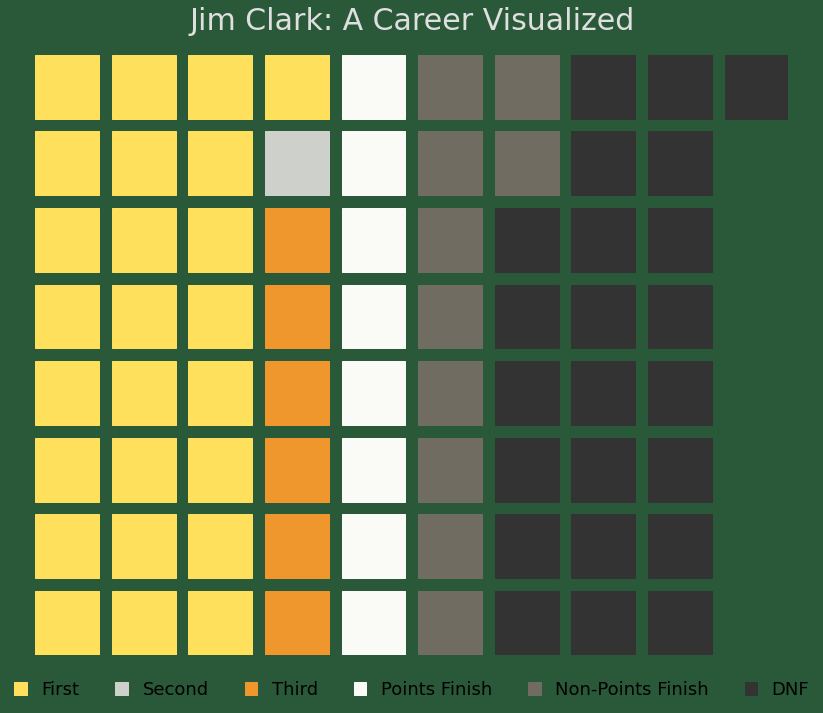

In [33]:
plt.figure(
    FigureClass=Waffle,
    rows=8, 
    labels=leg,
    values=vals,
    figsize=(14, 10),
    legend={'loc':'lower center', 'facecolor': 'xkcd:racing green', 'frameon': False, 'ncol':6, 'bbox_to_anchor':(0.5,-0.1), 'handlelength':0.7, 'fontsize': 18},
    facecolor='#295939',
    colors = ['#ffe05d', '#cdd0cb', '#ef962d', '#fafaf6', '#706c61', '#333333'],
    starting_location = 'NW',

)
plt.tight_layout()
plt.title('Jim Clark: A Career Visualized', fontsize = 30, color= '#dfdfdf', pad = 25)